In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
policy = pd.read_csv('policy.csv')
policy.head()



,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [2]:
pip install category_encoders


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


# EDA and Visualization

In [4]:
#Info about dataset/ checking null values of dataset
policy.info()
policy.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [5]:
#Removing unnecessary columns for this analyse
remove = ['Effective To Date','Months Since Last Claim']
policy.drop(remove, inplace=True, axis = 1)

Dividing dataset: There are unemployed customers whose income is 0. This can affect to our model. Unemployed customers may
have high risk. We can divide our model to 'Unemployed' and 'Others' for nalyze and modelling.

In [6]:
#Analysis of Unemployed customers' datas
Unemployed = policy.loc[policy['EmploymentStatus'] == 'Unemployed']
print('Shapes of Unemployed dataset:', Unemployed.shape)
Unemployed.head()

Shapes of Unemployed dataset: (2317, 22)


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,Unemployed,M,0,Urban,...,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
10,SX51350,California,4738.992022,No,Basic,College,Unemployed,M,0,Suburban,...,5,0,3,Personal Auto,Personal L3,Offer1,Agent,482.400000,Four-Door Car,Small
11,VQ65197,California,8197.197078,No,Basic,College,Unemployed,F,0,Suburban,...,87,0,3,Personal Auto,Personal L3,Offer2,Agent,528.000000,SUV,Medsize


In [7]:
#Analysis of Others' customers' datas
Others = policy.loc[policy['EmploymentStatus'] != 'Unemployed']
print('Employment Status:', Others['EmploymentStatus'].unique())
print('Shapes of Others dataset:', Others.shape)

Employment Status: ['Employed' 'Medical Leave' 'Disabled' 'Retired']
Shapes of Others dataset: (6817, 22)


In [8]:
Others.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,Employed,F,62902,Rural,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,Employed,F,55350,Suburban,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize


In [9]:
#Statisctics indicators of Unemployed dataset
Unemployed.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,2317.000000,2317.0,2317.000000,2317.000000,2317.000000,2317.000000,2317.000000
mean,7636.319761,0.0,93.973241,48.747087,0.391886,3.010790,599.579795
std,6623.586963,0.0,33.787116,27.932127,0.926059,2.388871,328.967738
min,1898.007675,0.0,61.000000,0.000000,0.000000,1.000000,2.455033
25%,3761.792015,0.0,69.000000,26.000000,0.000000,1.000000,379.200000
50%,5619.689084,0.0,84.000000,48.000000,0.000000,2.000000,524.836298
75%,8532.718297,0.0,110.000000,72.000000,0.000000,4.000000,731.479725
max,74228.516040,0.0,298.000000,99.000000,5.000000,9.000000,2759.794354


In [10]:
#Statisctics indicators of Others dataset
Others.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000
mean,8130.229340,50456.580461,92.963034,47.832624,0.381840,2.951005,377.840789
std,6949.067972,24305.956566,34.615160,27.895350,0.905048,2.390613,252.648952
min,2119.894333,10037.000000,61.000000,0.000000,0.000000,1.000000,0.099007
25%,4090.750678,28432.000000,68.000000,24.000000,0.000000,1.000000,210.100003
50%,5810.630529,48081.000000,83.000000,48.000000,0.000000,2.000000,340.800000
75%,9075.768214,70187.000000,109.000000,71.000000,0.000000,4.000000,498.612632
max,83325.381190,99981.000000,297.000000,99.000000,5.000000,9.000000,2893.239678


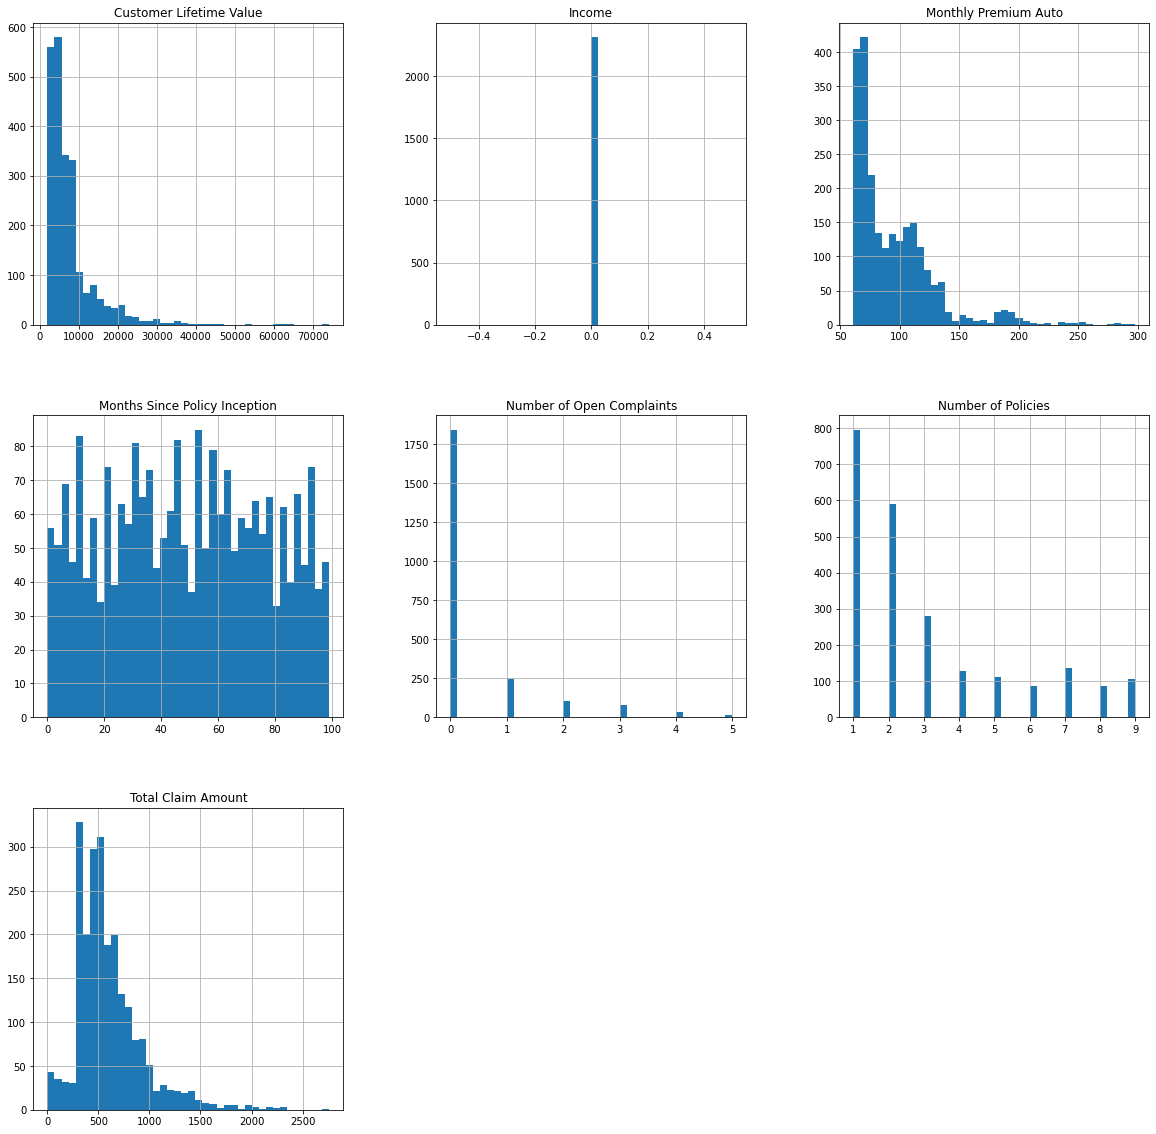

In [11]:
Unemployed.hist(bins=40 , figsize=(20,20))
plt.show()

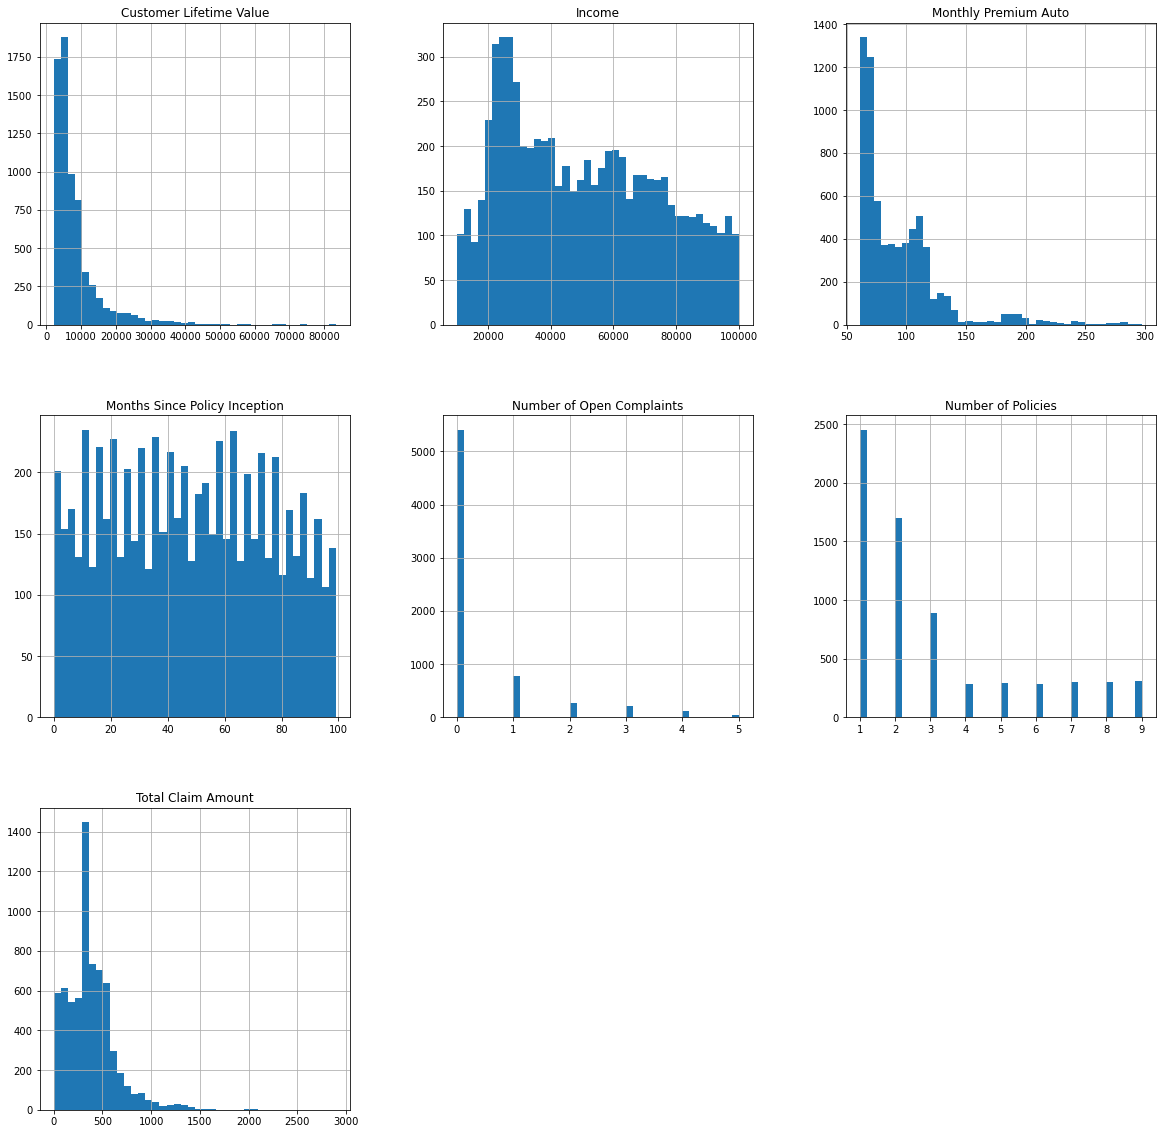

In [12]:
Others.hist(bins=40 , figsize=(20,20))
plt.show()

" Number of outliers show we have unequality among customers even their incomes are zero. We need show \nstatistics of cars' model, policy types and e.t.c. to see unequality reason "

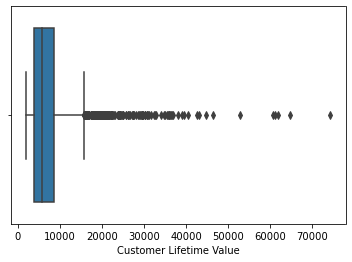

In [13]:
#Outliers of 'Customer Lifetime Value' 
sns.boxplot(x=Unemployed['Customer Lifetime Value'])
''' Number of outliers show we have unequality among customers even their incomes are zero. We need show 
statistics of cars' model, policy types and e.t.c. to see unequality reason '''

' Number of outliers show we have unequality among customers. Because of various customer range number of\noutliers have increased.\n'

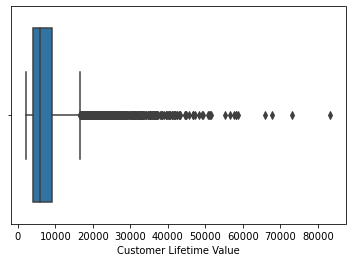

In [14]:
#Outliers of 'Customer Lifetime Value' 
sns.boxplot(x=Others['Customer Lifetime Value'])
''' Number of outliers show we have unequality among customers. Because of various customer range number of
outliers have increased.
'''

" We can assume our customers's gini index is nearer to inqeuality."

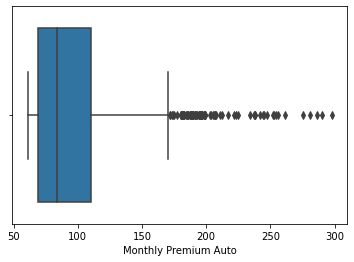

In [15]:
#Outliers of 'Monthly Premium Auto'
sns.boxplot(x=Unemployed['Monthly Premium Auto'])
''' We can assume our customers's gini index is nearer to inqeuality.'''

<AxesSubplot:xlabel='Monthly Premium Auto'>

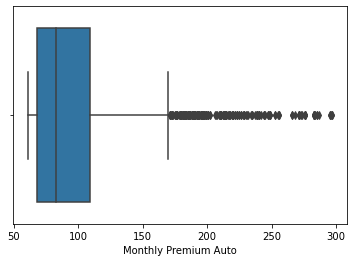

In [16]:
#Outliers of 'Monthly Premium Auto'
sns.boxplot(x=Others['Monthly Premium Auto'])
#There are some similarity distribution of outliers. İt means that income level has no effect at payments.

<AxesSubplot:xlabel='Total Claim Amount'>

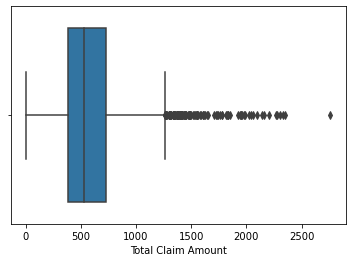

In [17]:
#Outliers of 'Total Claim Amount'
sns.boxplot(x=Unemployed['Total Claim Amount'])

<AxesSubplot:xlabel='Total Claim Amount'>

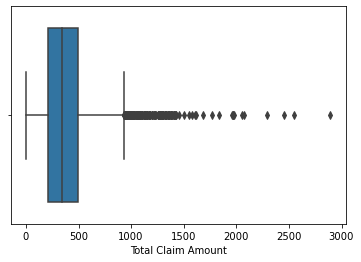

In [18]:
#Outliers of 'Total Claim Amount'
sns.boxplot(x=Others['Total Claim Amount'])

" As we see according distribution graphic of 'Months Since Policy Inception'distribution is \nnearer to normal distrubition. We can say per month for year number of customers who buys policy\ndon't difference so keen."

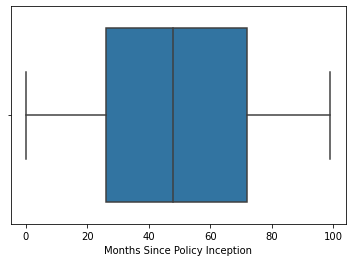

In [19]:
#Outliers of 'Months Since Policy Inception'
sns.boxplot(x=Unemployed['Months Since Policy Inception'])
''' As we see according distribution graphic of 'Months Since Policy Inception'distribution is 
nearer to normal distrubition. We can say per month for year number of customers who buys policy
don't difference so keen.'''

' İt shows dates of contract are close dates'

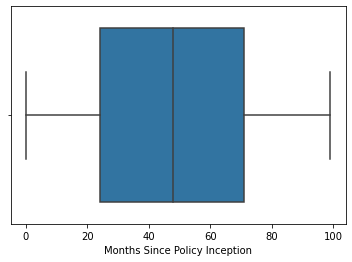

In [20]:
#Outliers of 'Months Since Policy Inception'
sns.boxplot(x=Others['Months Since Policy Inception'])
''' İt shows dates of contract are close dates'''

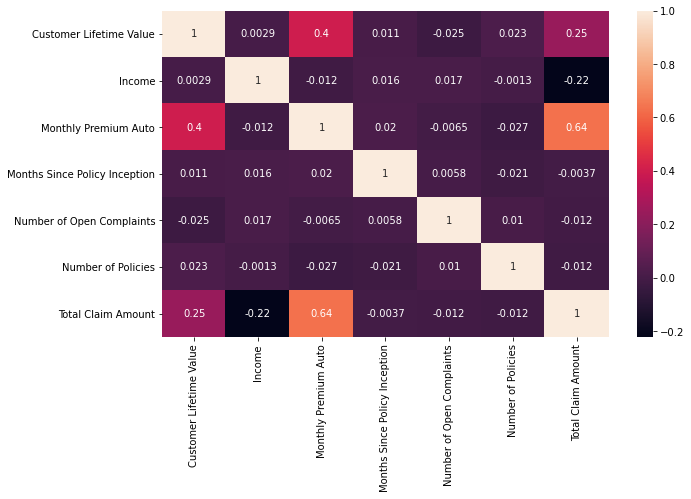

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(Others.corr(), annot = True)
plt.show()

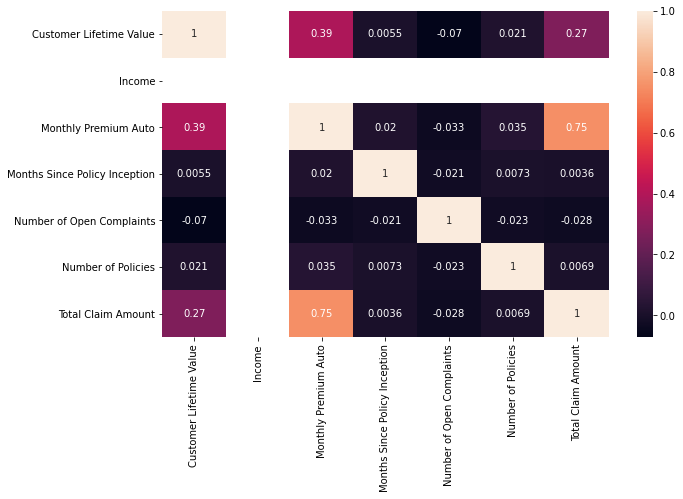

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(Unemployed.corr(), annot = True)
plt.show()

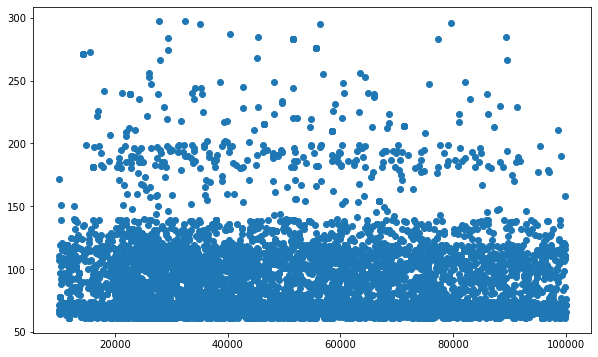

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(x = 'Income', y = 'Monthly Premium Auto', data = Others)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

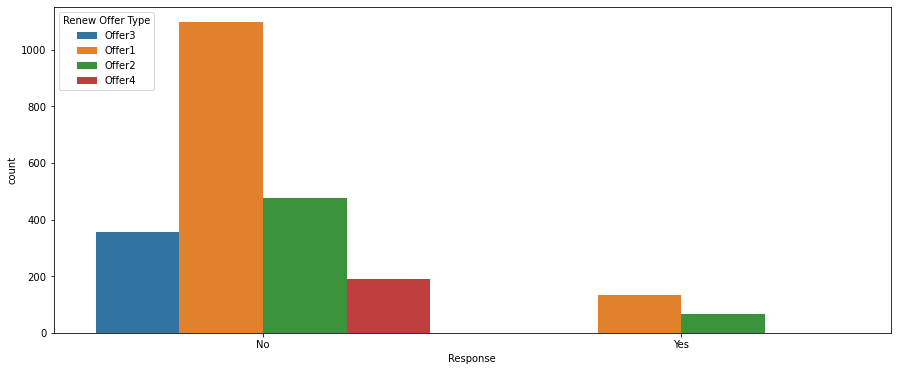

In [24]:
#We can cancel Offer3 and Offer4 for Unemployed customers.
plt.figure(figsize=(15,6))
sns.countplot(x=Unemployed['Response'], hue = Unemployed['Renew Offer Type'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

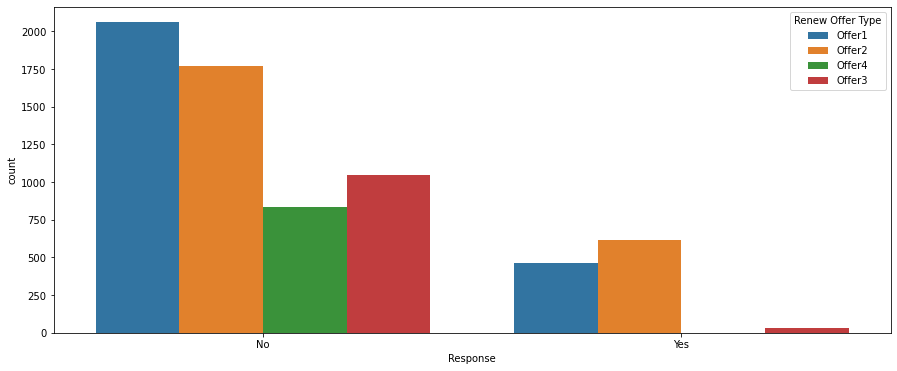

In [25]:
#We can cancel  Offer4 for Others.
plt.figure(figsize=(15,6))
sns.countplot(x=Others['Response'], hue = Others['Renew Offer Type'])
plt.show

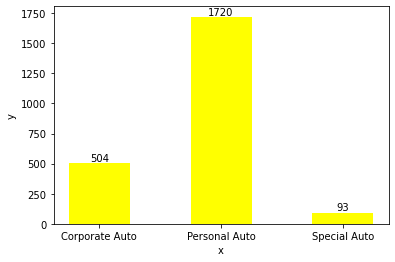

In [26]:
'''here are anamoly at choices of Unemployed customers. If they don't work why their have chose Corporate Auto package and 
expectedly most of customers had to be use Special Auto package but we see opposite result comparison with Others dataset  '''
a = Unemployed.groupby('Policy Type')['Customer'].count().reset_index()
x = a['Policy Type']
y = a['Customer']
plt.bar(x,y,width = 0.5, color = 'yellow')
plt.xlabel('x')
plt.ylabel('y')
for x,y in enumerate(y):
    plt.text(x,y,f'{y}', ha = 'center', va = 'bottom')
plt.show()

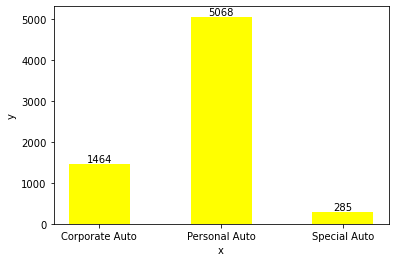

In [27]:
#Special auto
a = Others.groupby('Policy Type')['Customer'].count().reset_index()
x = a['Policy Type']
y = a['Customer']
plt.bar(x,y,width = 0.5, color = 'yellow')
plt.xlabel('x')
plt.ylabel('y')
for x,y in enumerate(y):
    plt.text(x,y,f'{y}', ha = 'center', va = 'bottom')
plt.show()

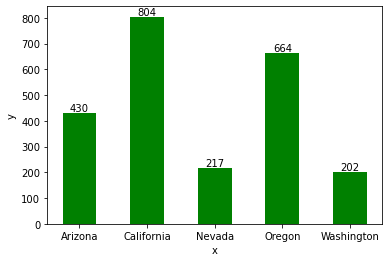

In [28]:
a = Unemployed.groupby('State')['Customer'].count().reset_index()
x = a['State']
y = a['Customer']
plt.bar(x,y,width = 0.5, color = 'green')
plt.xlabel('x')
plt.ylabel('y')
for x,y in enumerate(y):
    plt.text(x,y,f'{y}', ha = 'center', va = 'bottom')
plt.show()

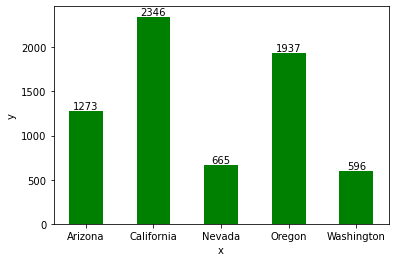

In [29]:
a = Others.groupby('State')['Customer'].count().reset_index()
x = a['State']
y = a['Customer']
plt.bar(x,y,width = 0.5, color = 'green')
plt.xlabel('x')
plt.ylabel('y')
for x,y in enumerate(y):
    plt.text(x,y,f'{y}', ha = 'center', va = 'bottom')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

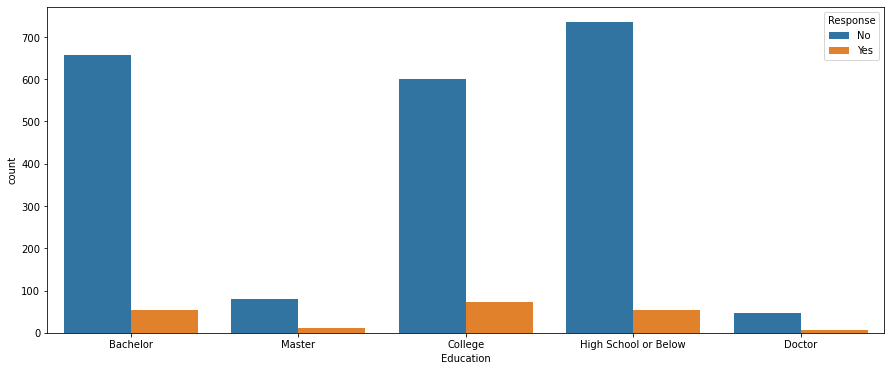

In [30]:
plt.figure(figsize=(15,6))
sns.countplot(x=Unemployed['Education'],hue = Unemployed['Response'])
plt.show

'There are similarity choices of customers for their education level'

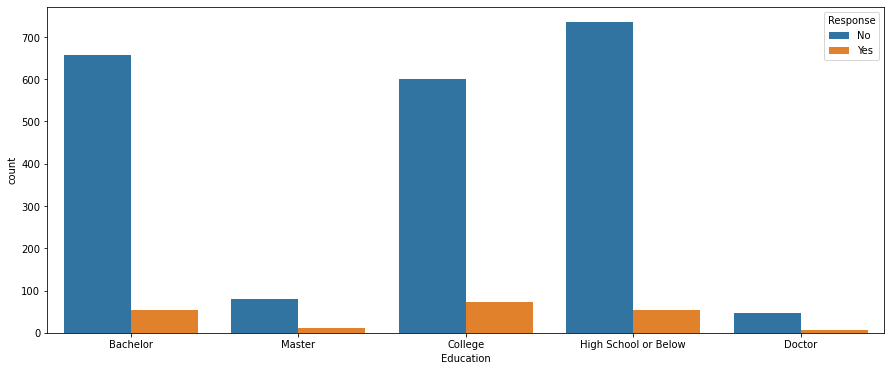

In [31]:
plt.figure(figsize=(15,6))
sns.countplot(x=Unemployed['Education'],hue = Unemployed['Response'])
plt.show
'''There are similarity choices of customers for their education level'''

<function matplotlib.pyplot.show(close=None, block=None)>

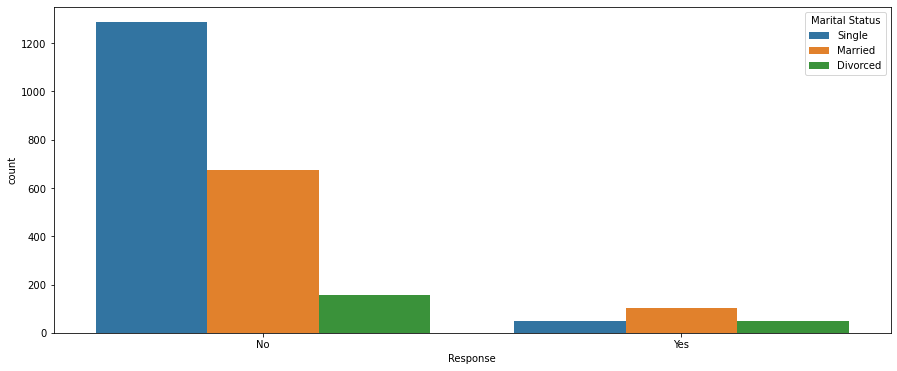

In [32]:
plt.figure(figsize=(15,6))
sns.countplot(x=Unemployed['Response'],hue = Unemployed['Marital Status'])
plt.show

'There are similarity choices of customers for their marital status'

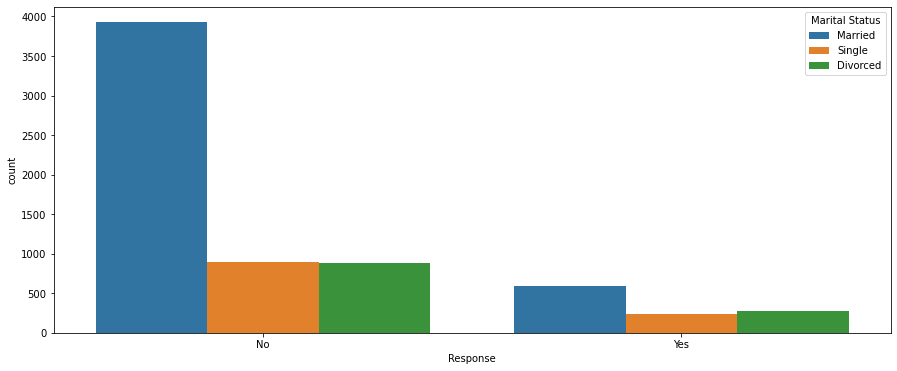

In [33]:
plt.figure(figsize=(15,6))
sns.countplot(x=Others['Response'],hue = Others['Marital Status'])
plt.show
'''There are similarity choices of customers for their marital status'''

<function matplotlib.pyplot.show(close=None, block=None)>

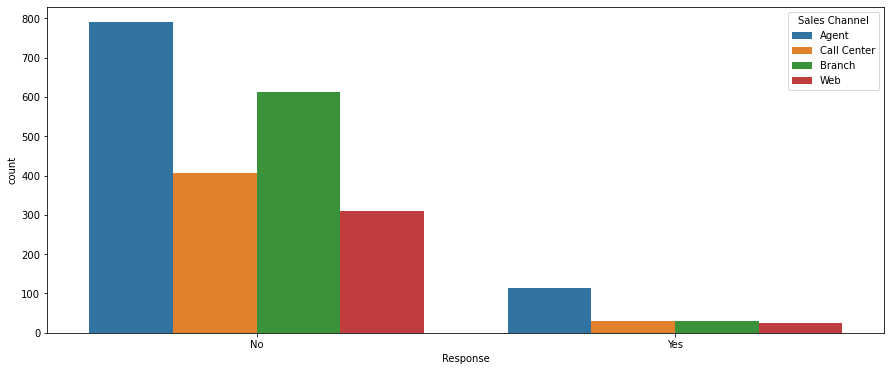

In [34]:
plt.figure(figsize=(15,6))
sns.countplot(x=Unemployed['Response'],hue = Unemployed['Sales Channel'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

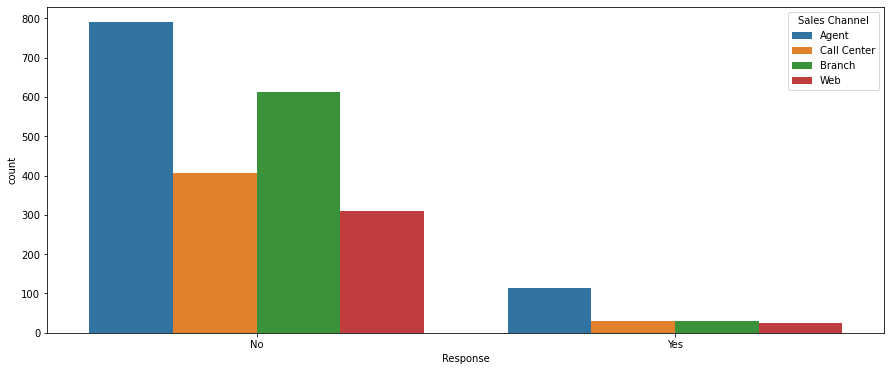

In [35]:
plt.figure(figsize=(15,6))
sns.countplot(x=Unemployed['Response'],hue = Unemployed['Sales Channel'])
plt.show

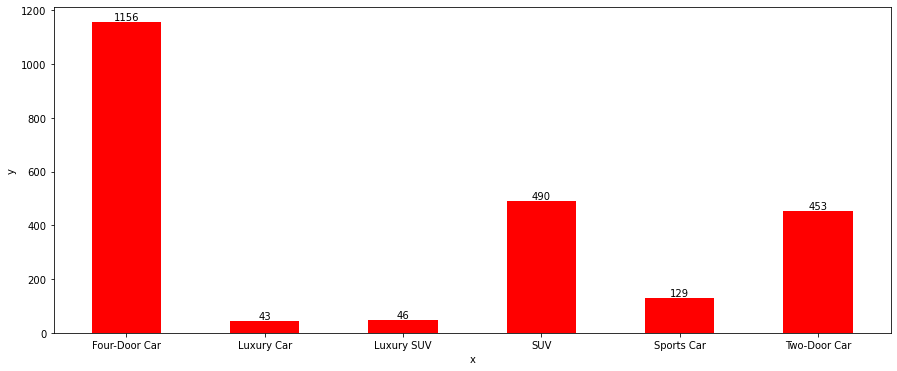

In [36]:
b = Unemployed.groupby('Vehicle Class')['Customer'].count().reset_index()
plt.figure(figsize=(15,6))
x = b['Vehicle Class']
y = b['Customer']
plt.bar(x,y,width = 0.5, color = 'red')
plt.xlabel('x')
plt.ylabel('y')
for x,y in enumerate(y):
    plt.text(x,y,f'{y}', ha = 'center', va = 'bottom')
plt.show()

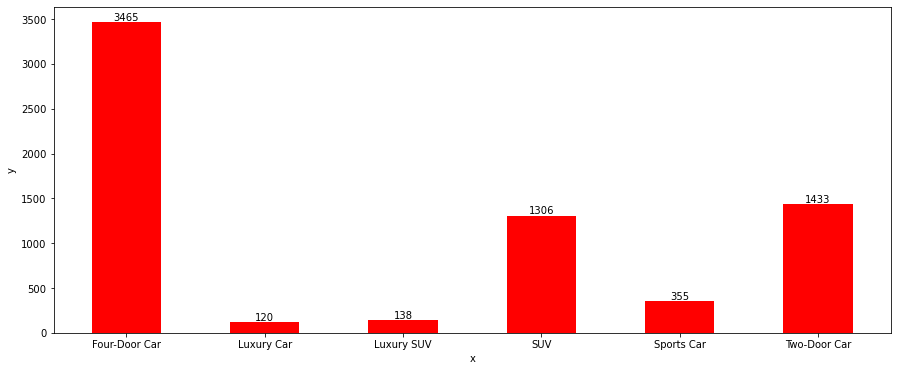

In [37]:
b = Others.groupby('Vehicle Class')['Customer'].count().reset_index()
plt.figure(figsize=(15,6))
x = b['Vehicle Class']
y = b['Customer']
plt.bar(x,y,width = 0.5, color = 'red')
plt.xlabel('x')
plt.ylabel('y')
for x,y in enumerate(y):
    plt.text(x,y,f'{y}', ha = 'center', va = 'bottom')
plt.show()

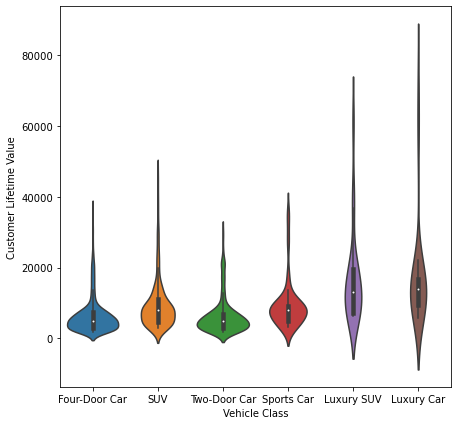

In [38]:
plt.figure(figsize=(7,7))
sns.violinplot(x='Vehicle Class' , y = 'Customer Lifetime Value' ,data=Unemployed)
plt.show()

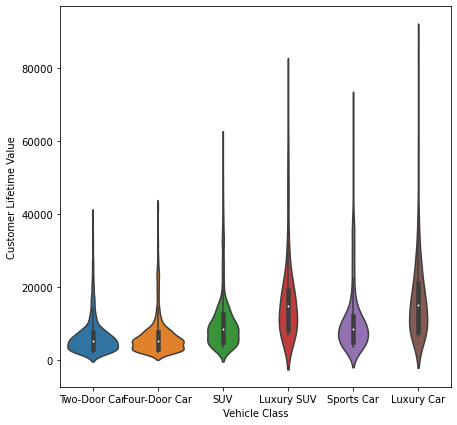

In [39]:
plt.figure(figsize=(7,7))
sns.violinplot(x='Vehicle Class' , y = 'Customer Lifetime Value' ,data=Others)
plt.show()

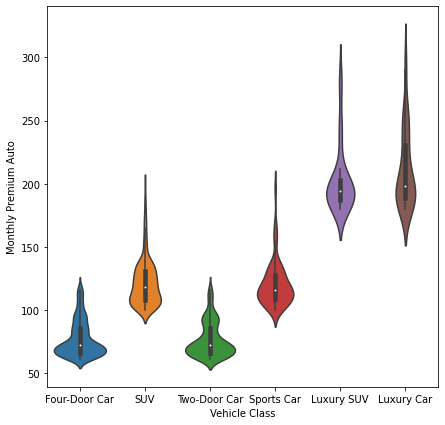

In [40]:
plt.figure(figsize=(7,7))
sns.violinplot(x='Vehicle Class' , y = 'Monthly Premium Auto' ,data=Unemployed)
plt.show()

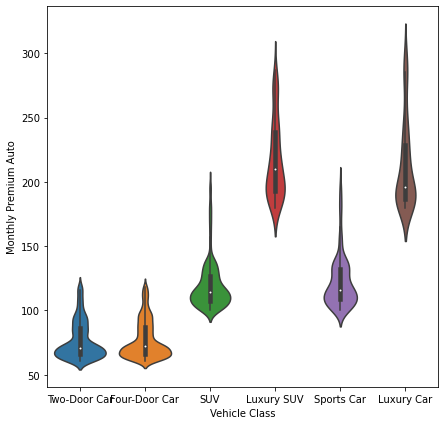

'This analyse shows us we have to know our customers. We see users of luxury and sport cars have effect to our lifetime value \neven they are small group of all customers'

In [41]:
plt.figure(figsize=(7,7))
sns.violinplot(x='Vehicle Class' , y = 'Monthly Premium Auto' ,data=Others)
plt.show()
'''This analyse shows us we have to know our customers. We see users of luxury and sport cars have effect to our lifetime value 
even they are small group of all customers'''

<function matplotlib.pyplot.show(close=None, block=None)>

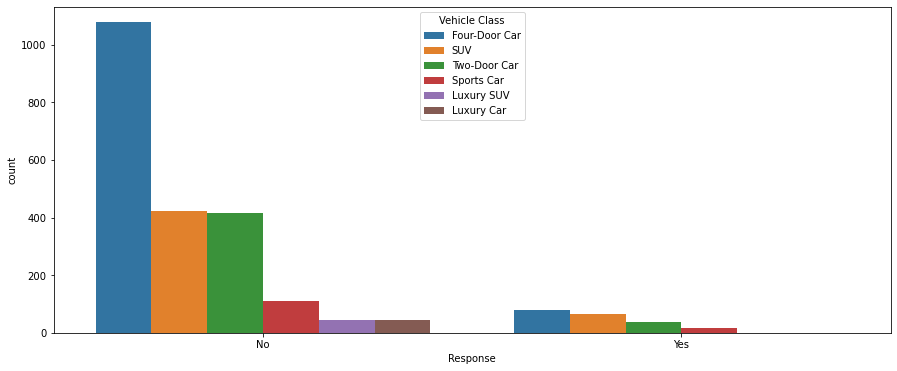

In [42]:
plt.figure(figsize=(15,6))
sns.countplot(x=Unemployed['Response'],hue = Unemployed['Vehicle Class'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

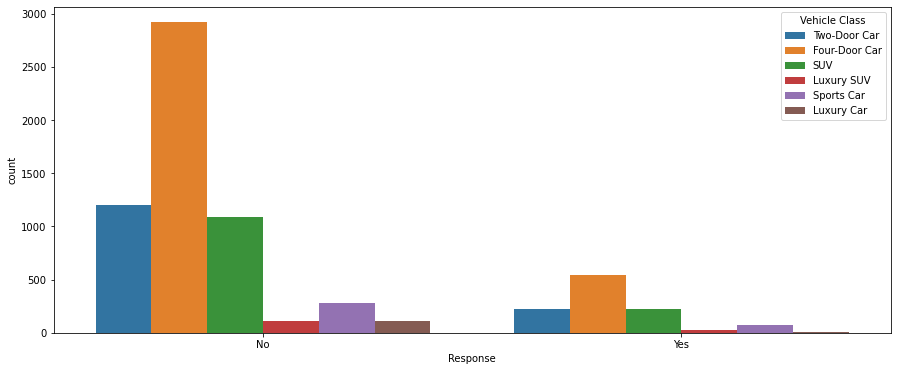

In [43]:
plt.figure(figsize=(15,6))
sns.countplot(x=Others['Response'],hue = Others['Vehicle Class'])
plt.show

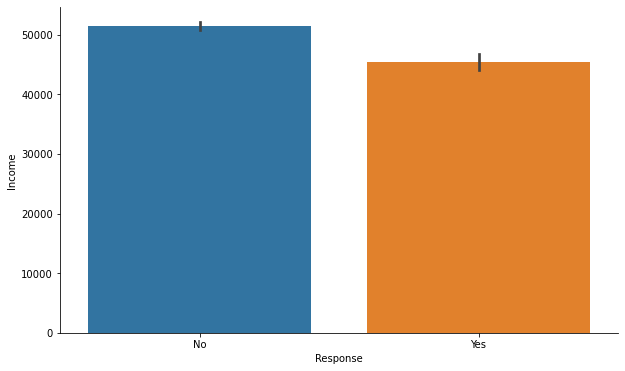

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(x=Others['Response'],y = Others['Income'])
sns.despine()
plt.show()

<AxesSubplot:xlabel='Number of Policies', ylabel='count'>

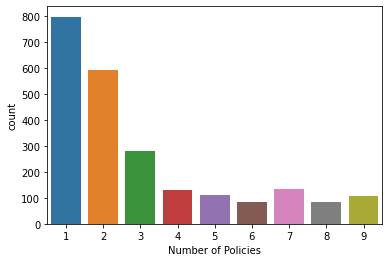

In [45]:

sns.countplot(x=Unemployed['Number of Policies'])

<AxesSubplot:xlabel='Number of Policies', ylabel='count'>

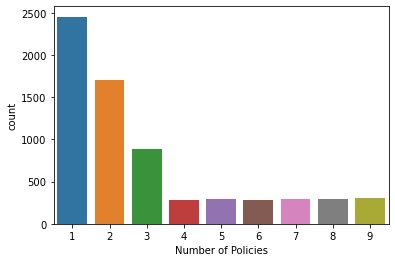

In [46]:

sns.countplot(x=Others['Number of Policies'])

<function matplotlib.pyplot.show(close=None, block=None)>

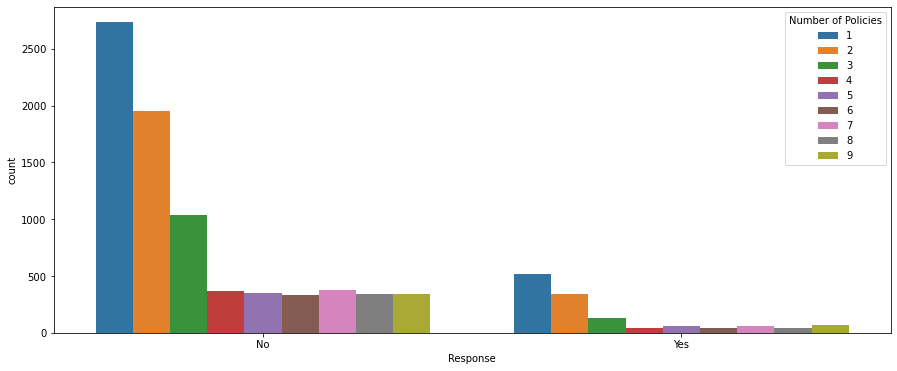

In [47]:
plt.figure(figsize=(15,6))
sns.countplot(x=policy['Response'], hue = policy['Number of Policies'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

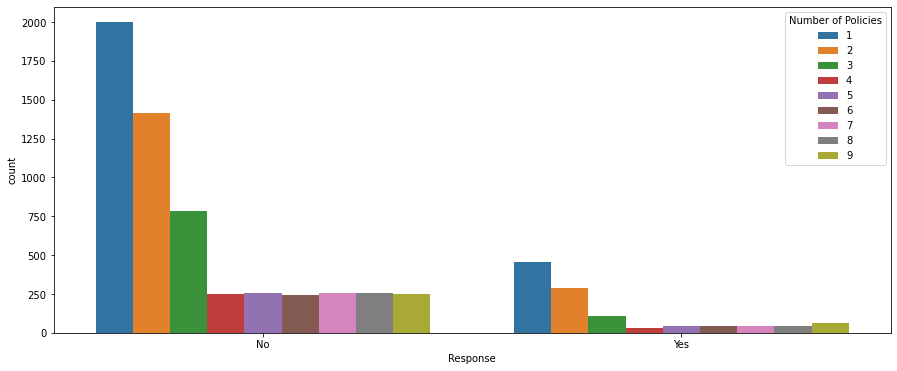

In [48]:
plt.figure(figsize=(15,6))
sns.countplot(x=Others['Response'], hue = Others['Number of Policies'])
plt.show

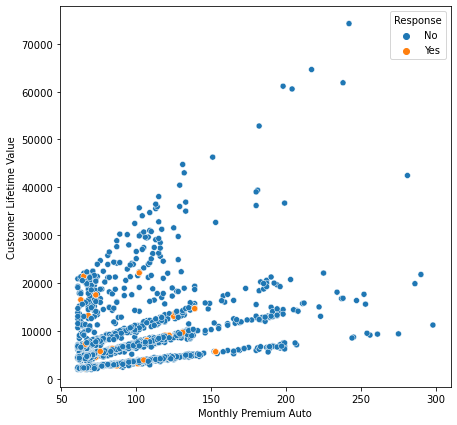

In [49]:
plt.figure(figsize=(7,7))
sns.scatterplot(x = 'Monthly Premium Auto', y = 'Customer Lifetime Value', hue = 'Response', data = Unemployed)
plt.show()

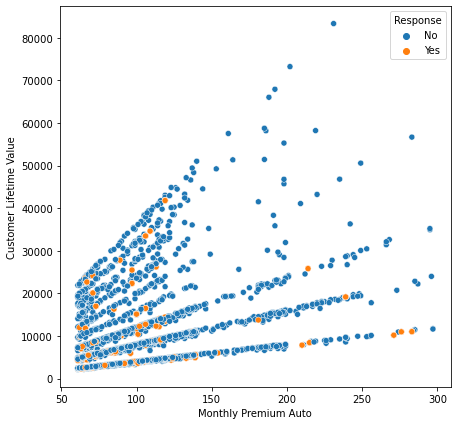

In [50]:
plt.figure(figsize=(7,7))
sns.scatterplot(x = 'Monthly Premium Auto', y = 'Customer Lifetime Value', hue = 'Response', data = Others)
plt.show()

We have imbalaced dataset

In [51]:
Unemployed.groupby('Response')['Customer Lifetime Value'].count()

Response
No     2119
Yes     198
Name: Customer Lifetime Value, dtype: int64

In [52]:
(Unemployed.loc[Unemployed['Response'] == 'No'].count())/(Unemployed.loc[Unemployed['Response'] == 'Yes'].count())

Customer                         10.70202
State                            10.70202
Customer Lifetime Value          10.70202
Response                         10.70202
Coverage                         10.70202
Education                        10.70202
EmploymentStatus                 10.70202
Gender                           10.70202
Income                           10.70202
Location Code                    10.70202
Marital Status                   10.70202
Monthly Premium Auto             10.70202
Months Since Policy Inception    10.70202
Number of Open Complaints        10.70202
Number of Policies               10.70202
Policy Type                      10.70202
Policy                           10.70202
Renew Offer Type                 10.70202
Sales Channel                    10.70202
Total Claim Amount               10.70202
Vehicle Class                    10.70202
Vehicle Size                     10.70202
dtype: float64

In [53]:


Others.groupby('Response')['Customer Lifetime Value'].count()


Response
No     5707
Yes    1110
Name: Customer Lifetime Value, dtype: int64

In [54]:
(Others.loc[Others['Response'] == 'No'].count())/(Others.loc[Others['Response'] == 'Yes'].count())

Customer                         5.141441
State                            5.141441
Customer Lifetime Value          5.141441
Response                         5.141441
Coverage                         5.141441
Education                        5.141441
EmploymentStatus                 5.141441
Gender                           5.141441
Income                           5.141441
Location Code                    5.141441
Marital Status                   5.141441
Monthly Premium Auto             5.141441
Months Since Policy Inception    5.141441
Number of Open Complaints        5.141441
Number of Policies               5.141441
Policy Type                      5.141441
Policy                           5.141441
Renew Offer Type                 5.141441
Sales Channel                    5.141441
Total Claim Amount               5.141441
Vehicle Class                    5.141441
Vehicle Size                     5.141441
dtype: float64

# Dropping unnecessary columns

In [55]:
import warnings
warnings.filterwarnings("ignore")

In [56]:
drop = Unemployed[['Customer','Income','EmploymentStatus','Policy']]
Unemployed.drop(drop,inplace=True,axis=1)

In [57]:
drop = Others[['Customer','Policy']]
Others.drop(drop,inplace=True,axis=1)


# Label and One Hot Encoding

In [58]:
from sklearn.preprocessing import LabelEncoder
a = LabelEncoder()
cat = ['Gender', 'Response']
for i in cat:
    Unemployed[i] = a.fit_transform(Unemployed[i])

In [59]:
from sklearn.preprocessing import LabelEncoder
a = LabelEncoder()
cat = ['Gender', 'Response']
for i in cat:
    Others[i] = a.fit_transform(Others[i])

In [60]:
from category_encoders.one_hot import OneHotEncoder
ohe = OneHotEncoder(use_cat_names=True)
x = pd.DataFrame(ohe.fit_transform(Unemployed[['State', 'Coverage', 'Education', 'Location Code','Marital Status',
'Policy Type','Renew Offer Type','Sales Channel','Vehicle Class', 'Vehicle Size' ]]))

drop = Unemployed[['State', 'Coverage', 'Education', 'Location Code','Marital Status','Policy Type',
'Renew Offer Type','Sales Channel','Vehicle Class', 'Vehicle Size' ]]
Unemployed.drop(drop,inplace=True,axis=1)


In [61]:
Unemployed =  Unemployed.join(x)

In [62]:
from category_encoders.one_hot import OneHotEncoder
a = OneHotEncoder(use_cat_names=True)
x = pd.DataFrame(a.fit_transform(Others[['State', 'Coverage', 'Education', 'Location Code','Marital Status','Policy Type',
'EmploymentStatus','Renew Offer Type','Sales Channel','Vehicle Class', 'Vehicle Size' ]]))
Other = Others.join(x)



In [63]:
drop = Other[['State', 'Coverage', 'Education', 'Location Code','Marital Status','Policy Type','EmploymentStatus',
'Renew Offer Type','Sales Channel','Vehicle Class', 'Vehicle Size' ]]
Other.drop(drop,inplace=True, axis = 1)

In [64]:
Other.head()

,Customer Lifetime Value,Response,Gender,Income,Monthly Premium Auto,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Washington,...,Sales Channel_Call Center,Vehicle Class_Two-Door Car,Vehicle Class_Four-Door Car,Vehicle Class_SUV,Vehicle Class_Luxury SUV,Vehicle Class_Sports Car,Vehicle Class_Luxury Car,Vehicle Size_Medsize,Vehicle Size_Small,Vehicle Size_Large
0,2763.519279,0,0,56274,69,5,0,1,384.811147,1,...,0,1,0,0,0,0,0,1,0,0
2,12887.431650,0,0,48767,108,38,0,2,566.472247,0,...,0,1,0,0,0,0,0,1,0,0
4,2813.692575,0,1,43836,73,44,0,1,138.130879,1,...,0,0,1,0,0,0,0,1,0,0
5,8256.297800,1,0,62902,69,94,0,2,159.383042,0,...,0,1,0,0,0,0,0,1,0,0
6,5380.898636,1,0,55350,67,13,0,9,321.600000,0,...,0,0,1,0,0,0,0,1,0,0


# Train-Test Split

Unemployed dataset

In [65]:
x_Unemployed = Unemployed.drop(['Response'],1)
y_Unemployed = Unemployed.iloc[:,1]

In [66]:
y_Unemployed.shape


(2317,)

In [67]:
x_Unemployed.shape

(2317, 46)

We use oversampling for imbalanced datasets (Unemployed dataset)

In [68]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(random_state = 1)
x_Unemployed, y_Unemployed = os.fit_resample(x_Unemployed,y_Unemployed)

In [69]:
x_Unemployed.shape

(4238, 46)

In [70]:
#Unemployed Dataset
x_Unemployed_train,x_Unemployed_test,y_Unemployed_train,y_Unemployed_test = train_test_split(x_Unemployed,y_Unemployed,test_size = 0.3,random_state=1)

In [71]:
x_Unemployed_test.ndim

2

In [72]:
print(x_Unemployed_train.shape, '', x_Unemployed_test.shape)

(2966, 46)  (1272, 46)


In [73]:
print(y_Unemployed_train.shape, '', y_Unemployed_test.shape)

(2966,)  (1272,)


Standard scaling for numerical features for Unemployed 

In [74]:
# numerical features
num_cols = Unemployed[['Customer Lifetime Value','Monthly Premium Auto','Months Since Policy Inception',
'Number of Open Complaints','Number of Policies', 'Total Claim Amount']]
sc = StandardScaler()

for i in num_cols:
 scale = sc.fit(x_Unemployed_train[[i]])  
 x_Unemployed_train[i] = scale.transform(x_Unemployed_train[[i]])
 x_Unemployed_test[i] = scale.transform(x_Unemployed_test[[i]])

Dimensionality Reduction(PCA) for Unemployed 

In [75]:
pca = PCA(n_components = 0.97)
x_pca = pca.fit(x_Unemployed_train)
x_Unemployed_train = x_pca.transform(x_Unemployed_train)
x_Unemployed_test = x_pca.transform(x_Unemployed_test)

Other Dataset

In [76]:
x_Other = Other.drop(['Response'],axis = 1)
y_Other = Other.iloc[:,1]

We use oversampling for imbalanced datasets (Other dataset)

In [77]:
os = RandomOverSampler(random_state = 1)
x_Other, y_Other = os.fit_resample(x_Other,y_Other)

In [78]:
#Other Dataset
x_Other_train,x_Other_test,y_Other_train,y_Other_test = train_test_split(x_Other,y_Other,test_size = 0.3,random_state=1)

Standard Scaling for Other dataset

In [79]:
# numerical features
num_cols =Other[['Customer Lifetime Value','Income','Monthly Premium Auto','Months Since Policy Inception',
'Number of Open Complaints','Number of Policies', 'Total Claim Amount']]
sc = StandardScaler()

for i in num_cols:  
 scale = sc.fit(x_Other_train[[i]])  
 x_Other_train[i] = scale.transform(x_Other_train[[i]]) 
 x_Other_test[i] = scale.transform(x_Other_test[[i]])

In [80]:
pca = PCA(n_components = 0.97)
x_pca = pca.fit(x_Other_train)
x_Other_train = x_pca.transform(x_Other_train)
x_Other_test = x_pca.transform(x_Other_test)

# Logistic regression for Unemployed dataset 

In [81]:
logistic_model_unemployed = LogisticRegression(solver='liblinear',random_state = 1)
logistic_model_unemployed .fit(x_Unemployed_train,y_Unemployed_train)
log_pred_Unemployed = logistic_model_unemployed.predict(x_Unemployed_test)

In [82]:
logistic_model_Unemployed = classification_report(y_Unemployed_test,log_pred_Unemployed)
matrix_LR_Unemployed  = pd.DataFrame(confusion_matrix(y_Unemployed_test,log_pred_Unemployed))
roc_auc_LR_Unemployed = roc_auc_score(y_Unemployed_test,log_pred_Unemployed )


In [83]:
logistic_model_Unemployed_score_train = logistic_model_unemployed.score(x_Unemployed_train,y_Unemployed_train)
logistic_model_Unemployed_score_test = logistic_model_unemployed.score(x_Unemployed_test,y_Unemployed_test)
print(logistic_model_Unemployed_score_train,logistic_model_Unemployed_score_test)

0.8297370195549562 0.8128930817610063


# Logistic regression for Other dataset

In [84]:
logistic_model_other = LogisticRegression(solver='liblinear',random_state = 1)
logistic_model_other.fit(x_Other_train,y_Other_train)
log_pred_Other = logistic_model_other.predict(x_Other_test)

In [85]:
logistic_model_Other= classification_report(y_Other_test,log_pred_Other)
matrix_LR_Other = pd.DataFrame(confusion_matrix(y_Other_test,log_pred_Other))
roc_auc_LR_Other = roc_auc_score(y_Other_test,log_pred_Other )


In [86]:
logistic_model_Other_score_train = logistic_model_other.score(x_Other_train,y_Other_train)
logistic_model_Other_score_test = logistic_model_other.score(x_Other_test,y_Other_test)
print(logistic_model_Other_score_train,logistic_model_Other_score_test)

0.7390161472024033 0.7258394160583942


# Results of Logistic Models

In [87]:
print(logistic_model_Unemployed,logistic_model_Other)
print(matrix_LR_Unemployed)
print(matrix_LR_Other)
print('roc_auc_LR_Unemployed:', roc_auc_LR_Unemployed)
print('roc_auc_LR_Other:', roc_auc_LR_Other)

              precision    recall  f1-score   support

           0       0.86      0.75      0.80       629
           1       0.78      0.88      0.83       643

    accuracy                           0.81      1272
   macro avg       0.82      0.81      0.81      1272
weighted avg       0.82      0.81      0.81      1272
               precision    recall  f1-score   support

           0       0.75      0.67      0.71      1706
           1       0.70      0.78      0.74      1719

    accuracy                           0.73      3425
   macro avg       0.73      0.73      0.72      3425
weighted avg       0.73      0.73      0.72      3425

     0    1
0  470  159
1   79  564
      0     1
0  1140   566
1   373  1346
roc_auc_LR_Unemployed: 0.8121781098635915
roc_auc_LR_Other: 0.7256215785643798


# Tuned parameters

In [88]:
tuned_logistic_model_unemployed = LogisticRegression(penalty = 'l1',tol=0.01, C = 7,solver='liblinear', random_state = 1)
tuned_logistic_model_unemployed .fit(x_Unemployed_train,y_Unemployed_train)
tuned_log_pred_Unemployed = tuned_logistic_model_unemployed.predict(x_Unemployed_test)

In [89]:
tuned_logistic_model_Unemployed = classification_report(y_Unemployed_test,tuned_log_pred_Unemployed)
tuned_matrix_LR_Unemployed  = pd.DataFrame(confusion_matrix(y_Unemployed_test,tuned_log_pred_Unemployed))
tuned_roc_auc_LR_Unemployed = roc_auc_score(y_Unemployed_test,tuned_log_pred_Unemployed )


In [90]:

tuned_logistic_model_unemployed_score_train = tuned_logistic_model_unemployed.score(x_Unemployed_train,y_Unemployed_train)
tuned_logistic_model_unemployed_score_test = tuned_logistic_model_unemployed.score(x_Unemployed_test,y_Unemployed_test)
print(tuned_logistic_model_unemployed_score_train,tuned_logistic_model_unemployed_score_test)

0.8607552258934592 0.8435534591194969


In [91]:
tuned_logistic_model_other = LogisticRegression(penalty = 'l1', tol=0.03, C = 9,solver='liblinear', random_state = 1)
tuned_logistic_model_other.fit(x_Other_train,y_Other_train)
tuned_log_pred_Other = logistic_model_other.predict(x_Other_test)

In [92]:
tuned_logistic_model_Other= classification_report(y_Other_test,tuned_log_pred_Other)
tuned_matrix_LR_Other = pd.DataFrame(confusion_matrix(y_Other_test,tuned_log_pred_Other))
tuned_roc_auc_LR_Other = roc_auc_score(y_Other_test,tuned_log_pred_Other )

In [93]:
tuned_logistic_model_Other_score_train = tuned_logistic_model_other.score(x_Other_train,y_Other_train)
tuned_logistic_model_Other_score_test = tuned_logistic_model_other.score(x_Other_test,y_Other_test)
print(tuned_logistic_model_Other_score_train,tuned_logistic_model_Other_score_test)

0.7391413193140568 0.722043795620438


# Results of tuned Logistic models

In [94]:
print(tuned_logistic_model_Unemployed,tuned_logistic_model_Other)
print(tuned_matrix_LR_Unemployed)
print(tuned_matrix_LR_Other)
print('tuned_roc_auc_LR_Unemployed:', tuned_roc_auc_LR_Unemployed)
print('tuned_roc_auc_LR_Other:', tuned_roc_auc_LR_Other)

              precision    recall  f1-score   support

           0       0.91      0.76      0.83       629
           1       0.80      0.92      0.86       643

    accuracy                           0.84      1272
   macro avg       0.85      0.84      0.84      1272
weighted avg       0.85      0.84      0.84      1272
               precision    recall  f1-score   support

           0       0.75      0.67      0.71      1706
           1       0.70      0.78      0.74      1719

    accuracy                           0.73      3425
   macro avg       0.73      0.73      0.72      3425
weighted avg       0.73      0.73      0.72      3425

     0    1
0  479  150
1   49  594
      0     1
0  1140   566
1   373  1346
tuned_roc_auc_LR_Unemployed: 0.8426604722003129
tuned_roc_auc_LR_Other: 0.7256215785643798


# SVC for Unemployed dataset 

In [95]:
SVM_Unemployed = SVC()
SVM_Unemployed.fit(x_Unemployed_train, y_Unemployed_train)
SVM_Unemployed_pred = SVM_Unemployed.predict(x_Unemployed_test)

In [96]:
SVM_Unemployed_ = classification_report(y_Unemployed_test,SVM_Unemployed_pred)
matrix_SVM_Unemployed = pd.DataFrame(confusion_matrix(y_Unemployed_test,SVM_Unemployed_pred))
roc_auc_SVM_Unemployed = roc_auc_score(y_Unemployed_test, SVM_Unemployed_pred )

In [97]:
SVM_Unemployed_score_train = SVM_Unemployed.score(x_Unemployed_train, y_Unemployed_train)
SVM_Unemployed_score_test = SVM_Unemployed.score(x_Unemployed_test, y_Unemployed_test)
print(SVM_Unemployed_score_train,SVM_Unemployed_score_test)

0.9935940660822656 0.9889937106918238


# SVC for Other dataset 

In [98]:
SVM_other = SVC()
SVM_other.fit(x_Other_train,y_Other_train)
SVM_pred_Other = SVM_other.predict(x_Other_test)

In [99]:
SVM_Other= classification_report(y_Other_test,log_pred_Other)
matrix_SVM_Other = pd.DataFrame(confusion_matrix(y_Other_test,SVM_pred_Other))
roc_auc_SVM_Other = roc_auc_score(y_Other_test,SVM_pred_Other )

In [100]:
SVM_Other_score_train = SVM_other.score(x_Other_train,y_Other_train)
SVM_Other_score_test = SVM_other.score(x_Other_test,y_Other_test)
print(SVM_Other_score_train,SVM_Other_score_test)

0.9662035298535486 0.9424817518248175


# Results of SVC Models

In [101]:
print(SVM_Unemployed_,SVM_Other)
print(matrix_SVM_Unemployed)
print(matrix_SVM_Other)
print('roc_auc_SVM_Unemployed:', roc_auc_SVM_Unemployed)
print('roc_auc_SVM_Other:', roc_auc_SVM_Other)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       629
           1       0.98      1.00      0.99       643

    accuracy                           0.99      1272
   macro avg       0.99      0.99      0.99      1272
weighted avg       0.99      0.99      0.99      1272
               precision    recall  f1-score   support

           0       0.75      0.67      0.71      1706
           1       0.70      0.78      0.74      1719

    accuracy                           0.73      3425
   macro avg       0.73      0.73      0.72      3425
weighted avg       0.73      0.73      0.72      3425

     0    1
0  615   14
1    0  643
      0     1
0  1514   192
1     5  1714
roc_auc_SVM_Unemployed: 0.9888712241653418
roc_auc_SVM_Other: 0.9422736848422603


# KNN Classifier for Unemployed dataset

In [102]:
error_rate = []
for i in range(1,60):
    
    KNN_unemployed = KNeighborsClassifier(n_neighbors=i)
    KNN_unemployed.fit(x_Unemployed_train, y_Unemployed_train)
    pred_i = KNN_unemployed.predict(x_Unemployed_test)
    error_rate.append(np.mean(pred_i != y_Unemployed_test))

Text(0, 0.5, 'Error (misclassification) Rate')

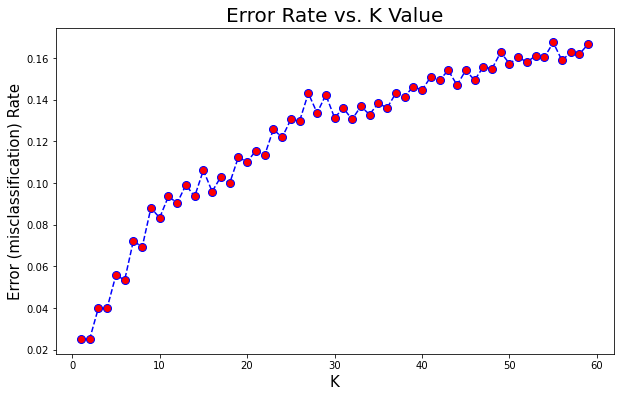

In [103]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value', fontsize=20)
plt.xlabel('K',fontsize=15)
plt.ylabel('Error (misclassification) Rate',fontsize=15)

In [104]:
KNN_unemployed = KNeighborsClassifier(n_neighbors=2)
KNN_unemployed.fit(x_Unemployed_train, y_Unemployed_train)
KNN_unemployed_pred = KNN_unemployed.predict(x_Unemployed_test)

In [105]:
KNN_Unemployed = classification_report(y_Unemployed_test,KNN_unemployed_pred)
matrix_KNN_Unemployed = pd.DataFrame(confusion_matrix(y_Unemployed_test,KNN_unemployed_pred))
roc_auc_KNN_Unemployed = roc_auc_score(y_Unemployed_test,KNN_unemployed_pred )

In [106]:
KNN_Unemployed_score_train = KNN_unemployed.score(x_Unemployed_train, y_Unemployed_train)
KNN_Unemployed_score_test = KNN_unemployed.score(x_Unemployed_test, y_Unemployed_test)
print(KNN_Unemployed_score_train,KNN_Unemployed_score_test)

1.0 0.9748427672955975


# KNN Classsifier for Other Dataset

In [107]:
error_rate = []
for i in range(1,60):
    
    KNN_other = KNeighborsClassifier(n_neighbors=i)
    KNN_other.fit(x_Other_train, y_Other_train)
    pred_i = KNN_other.predict(x_Other_test)
    error_rate.append(np.mean(pred_i != y_Other_test))

Text(0, 0.5, 'Error (misclassification) Rate')

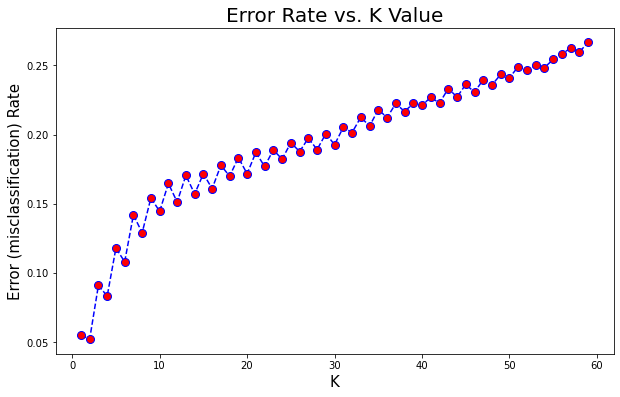

In [108]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value', fontsize=20)
plt.xlabel('K',fontsize=15)
plt.ylabel('Error (misclassification) Rate',fontsize=15)

In [109]:
KNN_other = KNeighborsClassifier(n_neighbors=2)
KNN_other.fit(x_Other_train, y_Other_train)
KNN_other_pred = KNN_other.predict(x_Other_test)

In [110]:
KNN_Other = classification_report(y_Other_test,KNN_other_pred)
matrix_KNN_Other = pd.DataFrame(confusion_matrix(y_Other_test,KNN_other_pred))
roc_auc_KNN_Other= roc_auc_score(y_Other_test,KNN_other_pred )

In [111]:
KNN_Other_score_train = KNN_other.score(x_Other_train, y_Other_train)
KNN_Other_score_test = KNN_other.score(x_Other_test, y_Other_test)
print(KNN_Other_score_train,KNN_Other_score_test)

1.0 0.9477372262773722


# Results of KNN Classifier

In [112]:
print(KNN_Unemployed,KNN_Other)
print(matrix_KNN_Unemployed)
print(matrix_KNN_Other)
print('roc_auc_KNN_Unemployed:', roc_auc_KNN_Unemployed)
print('roc_auc_KNN_Other:', roc_auc_KNN_Other)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       629
           1       0.95      1.00      0.98       643

    accuracy                           0.97      1272
   macro avg       0.98      0.97      0.97      1272
weighted avg       0.98      0.97      0.97      1272
               precision    recall  f1-score   support

           0       1.00      0.90      0.94      1706
           1       0.91      1.00      0.95      1719

    accuracy                           0.95      3425
   macro avg       0.95      0.95      0.95      3425
weighted avg       0.95      0.95      0.95      3425

     0    1
0  597   32
1    0  643
      0     1
0  1527   179
1     0  1719
roc_auc_KNN_Unemployed: 0.9745627980922099
roc_auc_KNN_Other: 0.9475381008206331


# XGBoost for Unemployed Dataset

In [113]:
xgboost_Unemployed = XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgboost_Unemployed.fit(x_Unemployed_train, y_Unemployed_train)
xgboost_Unemployed_pred = xgboost_Unemployed.predict(x_Unemployed_test)

[23:36:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [114]:
XGBoost_Unemployed = classification_report(y_Unemployed_test,xgboost_Unemployed_pred)
matrix_XGBoost_Unemployed = pd.DataFrame(confusion_matrix(y_Unemployed_test,xgboost_Unemployed_pred))
roc_auc_XGBoost_Unemployed = roc_auc_score(y_Unemployed_test, xgboost_Unemployed_pred)

In [115]:
xgboost_Unemployed_score_train = xgboost_Unemployed.score(x_Unemployed_train,y_Unemployed_train)
xgboost_Unemployed_score_test = xgboost_Unemployed.score(x_Unemployed_test,y_Unemployed_test)
print(xgboost_Unemployed_score_train,xgboost_Unemployed_score_test)

1.0 0.9944968553459119


# XGBoost for Other Dataset

In [116]:
xgboost_Other = XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 eval_metric = 'auc',                  
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgboost_Other.fit(x_Other_train, y_Other_train)
xgboost_Other_pred = xgboost_Other.predict(x_Other_test)

In [117]:
XGBoost_Other = classification_report(y_Other_test,xgboost_Other_pred)
matrix_XGBoost_Other = pd.DataFrame(confusion_matrix(y_Other_test,xgboost_Other_pred))
roc_auc_XGBoost_Other = roc_auc_score(y_Other_test, xgboost_Other_pred)

In [118]:
xgboost_Other_score_train = xgboost_Other.score(x_Other_train,y_Other_train)
xgboost_Other_score_test = xgboost_Other.score(x_Other_test,y_Other_test)
print(xgboost_Other_score_train,xgboost_Other_score_test)

1.0 0.9915328467153285


# Results of XGBoost

In [119]:
print(XGBoost_Unemployed,XGBoost_Other)
print(matrix_XGBoost_Unemployed)
print(matrix_XGBoost_Other)
print('roc_auc_XGBoost_Unemployed:', roc_auc_XGBoost_Unemployed)
print('roc_auc_KXGBoost_Other:', roc_auc_XGBoost_Other)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       629
           1       0.99      1.00      0.99       643

    accuracy                           0.99      1272
   macro avg       0.99      0.99      0.99      1272
weighted avg       0.99      0.99      0.99      1272
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1706
           1       0.98      1.00      0.99      1719

    accuracy                           0.99      3425
   macro avg       0.99      0.99      0.99      3425
weighted avg       0.99      0.99      0.99      3425

     0    1
0  622    7
1    0  643
      0     1
0  1677    29
1     0  1719
roc_auc_XGBoost_Unemployed: 0.9944356120826708
roc_auc_KXGBoost_Other: 0.9915005861664713


# Comparison of Models

In [120]:
Models_Unemployed = ['Logistic Regression for Unemployed',
          'Tuned Logistic Regression Unemployed',
          'SVC for Unemployed',
          'KNN for Unemployed',
          'XGBoost for Unemployed']
Test_scores_Unemployed = [logistic_model_unemployed.score(x_Unemployed_test,y_Unemployed_test),
               tuned_logistic_model_unemployed.score(x_Unemployed_test,y_Unemployed_test),
               SVM_Unemployed.score(x_Unemployed_test,y_Unemployed_test),
               KNN_unemployed.score(x_Unemployed_test, y_Unemployed_test),
               xgboost_Unemployed.score(x_Unemployed_test,y_Unemployed_test)]
    


In [121]:
Comparison_Unemployed = pd.DataFrame(list(zip(Models_Unemployed, Test_scores_Unemployed)), columns=['Models_Unemployed', 'Test_scores_Unemployed'])
Comparison_Unemployed

,Models_Unemployed,Test_scores_Unemployed
0,Logistic Regression for Unemployed,0.812893
1,Tuned Logistic Regression Unemployed,0.843553
2,SVC for Unemployed,0.988994
3,KNN for Unemployed,0.974843
4,XGBoost for Unemployed,0.994497


In [122]:
Models_Other = ['Logistic Regression for Other',
          'Tuned Logistic Regression Other',
          'SVC for Other',
          'KNN for Other',
          'XGBoost for Other']
Test_scores_Other = [logistic_model_other.score(x_Other_test,y_Other_test),
               tuned_logistic_model_other.score(x_Other_test,y_Other_test),
               SVM_other.score(x_Other_test,y_Other_test),
               KNN_other.score(x_Other_test, y_Other_test),
               xgboost_Other.score(x_Other_test,y_Other_test)]
    

In [123]:
Comparison_Other= pd.DataFrame(list(zip(Models_Other, Test_scores_Other)), columns=['Models_Other', 'Test_scores_Other'])
Comparison_Other

,Models_Other,Test_scores_Other
0,Logistic Regression for Other,0.725839
1,Tuned Logistic Regression Other,0.722044
2,SVC for Other,0.942482
3,KNN for Other,0.947737
4,XGBoost for Other,0.991533
